# **Conferinta stiintifica anuala "Cercetarea in Biomedicina si Sanatate: Calitate, Excelenta si Performanta"**

# Curs educational Aspectele metodologice ale analizei mortalitatii in "R"
---


> Olga Penina, Catedra de medicina sociala si management "Nicolae Testemitanu"
olga.penina@usmf.md




## **A. Calcularea ratelor standardizate ale mortalitatii prin metoda directa pentru RM in 2014-2022**

---



Datele necesare:
1. Numarul de decese pe sexe si varste pentru anii 2014-2022
2. Numarul populatiei pe sexe si varste pentru anii 2014-2022
3. Populatia standard (standardul European, 2013)

Sursa (1-2): Banca de date BNS, https://statistica.gov.md/ro

Sursa (3): https://ec.europa.eu/eurostat/web/products-manuals-and-guidelines/-/ks-ra-13-028

# ***A.1 Descarcarea datelor de pe GitHub. Utilizarea liniei de comanda***

https://github.com/PeninaOlga/Curs_USMF

In [2]:
## Verificam care este directorul nostru curent (calea curenta in sistemul de fisiere, unde ne aflam) pe Google Drive
## Utilizam linia de comanda, pwd (print working directory)
%%bash
pwd

/content


In [3]:
## Cream un nou fisier "Data" in directorul curent (mkdir) si verificam ce se afla in directorul curent (ls)
%%bash
pwd
mkdir Data
ls


/content
Data
sample_data


In [4]:
## Schimbam directoru (cd, change directory)
%%bash
cd /content/Data
pwd

/content/Data


In [9]:
## Descarcam datele privind numarul de decese pe sexe si varste in RM, 2014-2023 in format .csv aflate pe GitHub
%%bash
cd /content/Data/
wget https://raw.githubusercontent.com/PeninaOlga/Curs_USMF/main/pop_1x1.csv

--2023-10-17 19:04:50--  https://raw.githubusercontent.com/PeninaOlga/Curs_USMF/main/pop_1x1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21441 (21K) [text/plain]
Saving to: ‘pop_1x1.csv’

     0K .......... ..........                                 100% 26.0M=0.001s

2023-10-17 19:04:50 (26.0 MB/s) - ‘pop_1x1.csv’ saved [21441/21441]



In [27]:
## Descarcam datele privind numarul de populatie pe sexe si varste in RM, 2014-2023 in format .csv aflate pe GitHub
%%bash
cd /content/Data/
wget https://raw.githubusercontent.com/raspberrypi/linux/rpi-4.9.y/arch/arm/configs/bcmrpi_defconfig

--2023-10-17 18:55:07--  https://raw.githubusercontent.com/raspberrypi/linux/rpi-4.9.y/arch/arm/configs/bcmrpi_defconfig
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32525 (32K) [text/plain]
Saving to: ‘bcmrpi_defconfig’

     0K .......... .......... .......... .                    100% 4.03M=0.008s

2023-10-17 18:55:08 (4.03 MB/s) - ‘bcmrpi_defconfig’ saved [32525/32525]



In [121]:
## Descarcam datele privind populatia standard (European Standard Population, 2013)
%%bash
cd /content/Data
wget https://raw.githubusercontent.com/PeninaOlga/Curs_USMF/main/PopStandard.csv

--2023-10-17 22:18:07--  https://raw.githubusercontent.com/PeninaOlga/Curs_USMF/main/PopStandard.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177 [text/plain]
Saving to: ‘PopStandard.csv’

     0K                                                       100% 14.9M=0s

2023-10-17 22:18:07 (14.9 MB/s) - ‘PopStandard.csv’ saved [177/177]



In [10]:
## Verificam continutul fisierului "Data"
%%bash
cd /content/Data/
ls


d_1x1.csv
pop_1x1.csv
PopStandard.csv


# ***A.2 Niste exemple in R***

In [11]:
## Incepem sa lucram in R
%load_ext rpy2.ipython

In [93]:
## niste exemple in R: am creat o variabila X si i-am atribuit o valoare de '1'
%%R
x<-1
y<-2
z<-x+y
print(z)

[1] 3


In [94]:
## niste exemple in R: am creat un vector 'var' si ..
%%R
var<-c(1,2,3,4,5)
var

[1] 1 2 3 4 5


In [97]:
## niste exemple in R: .. si am adaugat 1 pentru fiecare valoare din vector
%%R
var+1

[1] 2 3 4 5 6


In [107]:
## niste exemple in R: am creat o matrice (3x3) si ..
%%R
my.matrix<-matrix(1:9, nrow=3, ncol=3)
my.matrix

     [,1] [,2] [,3]
[1,]    1    4    7
[2,]    2    5    8
[3,]    3    6    9


In [108]:
## .. si am transformat-o in 'data frame'
%%R
my.table<-as.data.frame(my.matrix)
my.table

  V1 V2 V3
1  1  4  7
2  2  5  8
3  3  6  9


In [112]:
## am extras valorile pentru variabila 'V2' din 'my.table'
%%R
my.table$V2

[1] 4 5 6


In [113]:
## am extras o valoare din 'my.table' (randul = 2, coloana = 3)
%%R
my.table[2,3]

[1] 8


# ***A.3 Descarcarea datelor in R***

In [16]:
## Cream tabelul 'data.pop' (read.csv) si vedem structura (str) tabelului in R
%%R
data.pop<-read.csv(file='/content/Data/pop_1x1.csv', header = TRUE, sep=",", stringsAsFactors=FALSE)
str(data.pop)

'data.frame':	870 obs. of  5 variables:
 $ Area  : chr  "TOT" "TOT" "TOT" "TOT" ...
 $ Year  : int  2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 ...
 $ Age   : int  999 0 1 2 3 4 5 6 7 8 ...
 $ Male  : int  1375786 19484 19349 18597 19348 19590 18262 18149 17203 16699 ...
 $ Female: int  1493516 18494 18304 17713 18396 18272 17592 17034 16060 15968 ...


In [18]:
## Cream tabelul 'data.d' (read.csv) si vedem structura (str) tabelului in R
%%R
data.d<-read.csv(file='/content/Data/d_1x1.csv', header = TRUE, sep=",", stringsAsFactors=FALSE)
str(data.d)

'data.frame':	918 obs. of  5 variables:
 $ Area  : chr  "TOT" "TOT" "TOT" "TOT" ...
 $ Age   : int  999 0 1 2 3 4 5 6 7 8 ...
 $ Year  : int  2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 ...
 $ Male  : int  20672 220 21 13 7 3 2 5 5 4 ...
 $ Female: int  18850 152 14 9 8 6 4 2 1 2 ...


In [122]:
## Cream tabelul 'pop.st' (read.csv) si vedem structura (str) tabelului in R
%%R
pop.st<-read.csv(file='/content/Data/PopStandard.csv', header = TRUE, sep=",", stringsAsFactors=FALSE)
str(pop.st)

'data.frame':	19 obs. of  2 variables:
 $ Age: int  0 1 5 10 15 20 25 30 35 40 ...
 $ Pop: int  1000 4000 5500 5500 5500 6000 6000 6500 7000 7000 ...


# ***A.4 Prelucrarea preliminara a datelor privind populatia in R***

In [20]:
## Vizualizam primele cinci randuri in tabelul 'data.pop' (head)
%%R
head(data.pop, 5)

  Area Year Age    Male  Female
1  TOT 2014 999 1375786 1493516
2  TOT 2014   0   19484   18494
3  TOT 2014   1   19349   18304
4  TOT 2014   2   18597   17713
5  TOT 2014   3   19348   18396


In [23]:
## Care sunt valorile unice pentru variabila "Year" (An)
%%R
unique(data.pop$Year)

 [1] 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023


In [ ]:
## Instalam pachetul 'tidyr' (install.packages) si il activam (library). Instalarea si activarea se face o singura data
%%R
install.packages('tidyr')
library(tidyr)

In [54]:
## transformam formatul tabelului 'data.pop' din 'lung' in 'larg'
%%R
data.pop1<-gather(data.pop, key="Sex", value="Population", Male:Female)
head(data.pop1)

  Area Year Age  Sex Population
1  TOT 2014 999 Male    1375786
2  TOT 2014   0 Male      19484
3  TOT 2014   1 Male      19349
4  TOT 2014   2 Male      18597
5  TOT 2014   3 Male      19348
6  TOT 2014   4 Male      19590


In [57]:
## Grupe de varsta in 'data.pop1'
%%R
unique(data.pop1$Age)

 [1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
[51] 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
[76] 75 76 77 78 79 80 81 82 83 84 85


In [56]:
## excludem varsta = 999 (toate varstele) din tabelul 'data.pop1'
%%R
data.pop1<-data.pop1[data.pop1$Age!=999,]

In [58]:
%%R
str(data.pop1)

'data.frame':	1720 obs. of  5 variables:
 $ Area      : chr  "TOT" "TOT" "TOT" "TOT" ...
 $ Year      : int  2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 ...
 $ Age       : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Sex       : chr  "Male" "Male" "Male" "Male" ...
 $ Population: int  19484 19349 18597 19348 19590 18262 18149 17203 16699 16626 ...


In [62]:
## cream o variabila 'Age1' pentru grupe cincinale (0, 1-4, 5-9, ... 85+)
%%R
data.pop1$Age1<-cut(data.pop1$Age,
                   breaks=c(-Inf, 1,5,10,15,20,25,30,35, 40,45,50,55, 60,65,70,75,80,85,Inf),
                   labels=c(0,1,5,10,15,20,25,30,35, 40,45,50,55, 60,65,70,75,80,85),
                   right=FALSE)
head(data.pop1, 15)

   Area Year Age  Sex Population Age1
2   TOT 2014   0 Male      19484    0
3   TOT 2014   1 Male      19349    1
4   TOT 2014   2 Male      18597    1
5   TOT 2014   3 Male      19348    1
6   TOT 2014   4 Male      19590    1
7   TOT 2014   5 Male      18262    5
8   TOT 2014   6 Male      18149    5
9   TOT 2014   7 Male      17203    5
10  TOT 2014   8 Male      16699    5
11  TOT 2014   9 Male      16626    5
12  TOT 2014  10 Male      15728   10
13  TOT 2014  11 Male      16055   10
14  TOT 2014  12 Male      15515   10
15  TOT 2014  13 Male      16779   10
16  TOT 2014  14 Male      16365   10


In [64]:
## agregam populatia pe grupe cincinale (aggregate)
%%R
data.pop2<-aggregate(data.pop1$Population, by=list(data.pop1$Area, data.pop1$Year, data.pop1$Age1, data.pop1$Sex), sum)
head(data.pop2)

  Group.1 Group.2 Group.3 Group.4     x
1     TOT    2014       0  Female 18494
2     TOT    2015       0  Female 19535
3     TOT    2016       0  Female 19423
4     TOT    2017       0  Female 19011
5     TOT    2018       0  Female 17327
6     TOT    2019       0  Female 16050


In [66]:
## Denumim coloanele din nou tabel (colnames)
%%R
colnames(data.pop2)<-c('Area', 'Year','Age','Sex','Population')
head(data.pop2)
str(data.pop2)

'data.frame':	380 obs. of  5 variables:
 $ Area      : chr  "TOT" "TOT" "TOT" "TOT" ...
 $ Year      : int  2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 ...
 $ Age       : Factor w/ 19 levels "0","1","5","10",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Sex       : chr  "Female" "Female" "Female" "Female" ...
 $ Population: int  18494 19535 19423 19011 17327 16050 15013 14258 13347 12229 ...


In [70]:
## Schimbam formatul coloanei 'Age' (din Factor la Character)
%%R
data.pop2$Age<-as.character(data.pop2$Age)
str(data.pop2)
unique(data.pop2$Age)

'data.frame':	380 obs. of  5 variables:
 $ Area      : chr  "TOT" "TOT" "TOT" "TOT" ...
 $ Year      : int  2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 ...
 $ Age       : chr  "0" "0" "0" "0" ...
 $ Sex       : chr  "Female" "Female" "Female" "Female" ...
 $ Population: int  18494 19535 19423 19011 17327 16050 15013 14258 13347 12229 ...
 [1] "0"  "1"  "5"  "10" "15" "20" "25" "30" "35" "40" "45" "50" "55" "60" "65"
[16] "70" "75" "80" "85"


# ***A.5 Prelucrarea preliminara a datelor privind numarul deceselor in R (lucrul individual)***

In [72]:
## Vizualizati primele cinci randuri in tabelul 'data.d' (head)
%%R
head(data.d, 5)

  Area Age Year  Male Female
1  TOT 999 2014 20672  18850
2  TOT   0 2014   220    152
3  TOT   1 2014    21     14
4  TOT   2 2014    13      9
5  TOT   3 2014     7      8


In [73]:
## Care sunt valorile unice pentru variabila "Year" (An)
%%R
unique(data.d$Year)

[1] 2014 2015 2016 2017 2018 2019 2020 2021 2022


In [74]:
## transformati formatul tabelului 'data.d' din 'lung' in 'larg'
%%R
data.d1<-gather(data.d, key="Sex", value="Deaths", Male:Female)
head(data.d1)

  Area Age Year  Sex Deaths
1  TOT 999 2014 Male  20672
2  TOT   0 2014 Male    220
3  TOT   1 2014 Male     21
4  TOT   2 2014 Male     13
5  TOT   3 2014 Male      7
6  TOT   4 2014 Male      3


In [77]:
## Care sunt grupe de varsta in 'data.d1'
%%R
unique(data.d1$Age)

  [1]   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
 [19]  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
 [37]  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
 [55]  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
 [73]  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
 [91]  90  91  92  93  94  95  96  97  98  99 100


In [76]:
## Excludeti varsta = 999 (toate varstele) din tabelul 'data.d1'
%%R
data.d1<-data.d1[data.d1$Age!=999,]

In [78]:
%%R
str(data.d1)

'data.frame':	1818 obs. of  5 variables:
 $ Area  : chr  "TOT" "TOT" "TOT" "TOT" ...
 $ Age   : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Year  : int  2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 ...
 $ Sex   : chr  "Male" "Male" "Male" "Male" ...
 $ Deaths: int  220 21 13 7 3 2 5 5 4 7 ...


In [79]:
## Creati o variabila 'Age1' pentru grupe cincinale (0, 1-4, 5-9, ... 85+)
%%R
data.d1$Age1<-cut(data.d1$Age,
                   breaks=c(-Inf, 1,5,10,15,20,25,30,35, 40,45,50,55, 60,65,70,75,80,85,Inf),
                   labels=c(0,1,5,10,15,20,25,30,35, 40,45,50,55, 60,65,70,75,80,85),
                   right=FALSE)
head(data.d1, 15)

   Area Age Year  Sex Deaths Age1
2   TOT   0 2014 Male    220    0
3   TOT   1 2014 Male     21    1
4   TOT   2 2014 Male     13    1
5   TOT   3 2014 Male      7    1
6   TOT   4 2014 Male      3    1
7   TOT   5 2014 Male      2    5
8   TOT   6 2014 Male      5    5
9   TOT   7 2014 Male      5    5
10  TOT   8 2014 Male      4    5
11  TOT   9 2014 Male      7    5
12  TOT  10 2014 Male      4   10
13  TOT  11 2014 Male      6   10
14  TOT  12 2014 Male      3   10
15  TOT  13 2014 Male      8   10
16  TOT  14 2014 Male     11   10


In [82]:
## Agregati populatia pe grupe cincinale (aggregate)
%%R
data.d2<-aggregate(data.d1$Deaths, by=list(data.d1$Area, data.d1$Year, data.d1$Age1, data.d1$Sex), sum)
head(data.d2)

  Group.1 Group.2 Group.3 Group.4   x
1     TOT    2014       0  Female 152
2     TOT    2015       0  Female 147
3     TOT    2016       0  Female 145
4     TOT    2017       0  Female 147
5     TOT    2018       0  Female 127
6     TOT    2019       0  Female 130


In [83]:
## Denumiti coloanele din nou tabel (colnames)
%%R
colnames(data.d2)<-c('Area', 'Year','Age','Sex','Deaths')
head(data.d2)
str(data.d2)

'data.frame':	342 obs. of  5 variables:
 $ Area  : chr  "TOT" "TOT" "TOT" "TOT" ...
 $ Year  : int  2014 2015 2016 2017 2018 2019 2020 2021 2022 2014 ...
 $ Age   : Factor w/ 19 levels "0","1","5","10",..: 1 1 1 1 1 1 1 1 1 2 ...
 $ Sex   : chr  "Female" "Female" "Female" "Female" ...
 $ Deaths: int  152 147 145 147 127 130 123 114 109 37 ...


In [84]:
## Schimbati formatul coloanei 'Age' (din Factor la Character)
%%R
data.d2$Age<-as.character(data.d2$Age)
str(data.d2)
unique(data.d2$Age)

'data.frame':	342 obs. of  5 variables:
 $ Area  : chr  "TOT" "TOT" "TOT" "TOT" ...
 $ Year  : int  2014 2015 2016 2017 2018 2019 2020 2021 2022 2014 ...
 $ Age   : chr  "0" "0" "0" "0" ...
 $ Sex   : chr  "Female" "Female" "Female" "Female" ...
 $ Deaths: int  152 147 145 147 127 130 123 114 109 37 ...
 [1] "0"  "1"  "5"  "10" "15" "20" "25" "30" "35" "40" "45" "50" "55" "60" "65"
[16] "70" "75" "80" "85"


# ***A.6 Calcularea ratelor standardizate ale mortalitatii prin metoda directa in R:***

In [151]:
## Utilizam datele din trei tabele
## Populatia standard
%%R
str(pop.st)

'data.frame':	19 obs. of  2 variables:
 $ Age: int  0 1 5 10 15 20 25 30 35 40 ...
 $ Pop: int  1000 4000 5500 5500 5500 6000 6000 6500 7000 7000 ...


In [153]:
## datele privind populatia pe grupe cincinale
%%R
data.pop2<-data.pop2[data.pop2$Year!=2023,]
str(data.pop2)

'data.frame':	342 obs. of  5 variables:
 $ Area      : chr  "TOT" "TOT" "TOT" "TOT" ...
 $ Year      : int  2014 2015 2016 2017 2018 2019 2020 2021 2022 2014 ...
 $ Age       : int  0 0 0 0 0 0 0 0 0 1 ...
 $ Sex       : chr  "Female" "Female" "Female" "Female" ...
 $ Population: int  18494 19535 19423 19011 17327 16050 15013 14258 13347 72685 ...


In [152]:
## transformam variabila 'Age' din tabelul 'data.pop2' din 'character' in 'integer'
%%R
data.pop2$Age<-as.integer(data.pop2$Age)

In [156]:
## datele privind decesele pe grupe cincinale
%%R
str(data.d2)

'data.frame':	342 obs. of  5 variables:
 $ Area  : chr  "TOT" "TOT" "TOT" "TOT" ...
 $ Year  : int  2014 2015 2016 2017 2018 2019 2020 2021 2022 2014 ...
 $ Age   : int  0 0 0 0 0 0 0 0 0 1 ...
 $ Sex   : chr  "Female" "Female" "Female" "Female" ...
 $ Deaths: int  152 147 145 147 127 130 123 114 109 37 ...


In [155]:
## transformam variabila 'Age' din tabelul 'data.d2' din 'character' in 'integer'
%%R
data.d2$Age<-as.integer(data.d2$Age)

In [ ]:
## Instalam pachetul "dplyr"
%%R
install.packages('dplyr')
library(dplyr)

In [158]:
## Unim doua tabele (data.pop2 si data.d2) intr-un table dupa an, varsta si sex (left_join)
%%R
my.data<-left_join(x=data.pop2, y=data.d2, by=c('Area', 'Year', 'Age', 'Sex'))
head(my.data)

  Area Year Age    Sex Population Deaths
1  TOT 2014   0 Female      18494    152
2  TOT 2015   0 Female      19535    147
3  TOT 2016   0 Female      19423    145
4  TOT 2017   0 Female      19011    147
5  TOT 2018   0 Female      17327    127
6  TOT 2019   0 Female      16050    130


In [159]:
## Verificam structura tabelului creat
%%R
str(my.data)

'data.frame':	342 obs. of  6 variables:
 $ Area      : chr  "TOT" "TOT" "TOT" "TOT" ...
 $ Year      : int  2014 2015 2016 2017 2018 2019 2020 2021 2022 2014 ...
 $ Age       : int  0 0 0 0 0 0 0 0 0 1 ...
 $ Sex       : chr  "Female" "Female" "Female" "Female" ...
 $ Population: int  18494 19535 19423 19011 17327 16050 15013 14258 13347 72685 ...
 $ Deaths    : int  152 147 145 147 127 130 123 114 109 37 ...


In [171]:
## Calculam ratele specifice de mortalitate pe varste si sexe (o noua variabila)
%%R
my.data$ASDR<-my.data$Deaths / my.data$Population
head(my.data)

  Area Year Age    Sex Population Deaths        ASDR
1  TOT 2014   0 Female      18494    152 0.008218882
2  TOT 2015   0 Female      19535    147 0.007524955
3  TOT 2016   0 Female      19423    145 0.007465376
4  TOT 2017   0 Female      19011    147 0.007732365
5  TOT 2018   0 Female      17327    127 0.007329601
6  TOT 2019   0 Female      16050    130 0.008099688


In [174]:
## Unim tabelul 'my.table' cu 'pop.st' pe varste
%%R
my.data1<-left_join(x=my.data, y=pop.st, by='Age')
head(my.data1,15)

   Area Year Age    Sex Population Deaths         ASDR  Pop
1   TOT 2014   0 Female      18494    152 0.0082188818 1000
2   TOT 2015   0 Female      19535    147 0.0075249552 1000
3   TOT 2016   0 Female      19423    145 0.0074653761 1000
4   TOT 2017   0 Female      19011    147 0.0077323655 1000
5   TOT 2018   0 Female      17327    127 0.0073296012 1000
6   TOT 2019   0 Female      16050    130 0.0080996885 1000
7   TOT 2020   0 Female      15013    123 0.0081928995 1000
8   TOT 2021   0 Female      14258    114 0.0079955113 1000
9   TOT 2022   0 Female      13347    109 0.0081666292 1000
10  TOT 2014   1 Female      72685     37 0.0005090459 4000
11  TOT 2015   1 Female      71452     23 0.0003218944 4000
12  TOT 2016   1 Female      71907     40 0.0005562741 4000
13  TOT 2017   1 Female      72647     29 0.0003991906 4000
14  TOT 2018   1 Female      72804     28 0.0003845943 4000
15  TOT 2019   1 Female      70460     19 0.0002696565 4000


In [176]:
## Calculam numarul asteptat de decese pe varste si sexe
%%R
my.data1$Expected_d<-my.data1$ASDR * my.data1$Pop
head(my.data1)

  Area Year Age    Sex Population Deaths        ASDR  Pop Expected_d
1  TOT 2014   0 Female      18494    152 0.008218882 1000   8.218882
2  TOT 2015   0 Female      19535    147 0.007524955 1000   7.524955
3  TOT 2016   0 Female      19423    145 0.007465376 1000   7.465376
4  TOT 2017   0 Female      19011    147 0.007732365 1000   7.732365
5  TOT 2018   0 Female      17327    127 0.007329601 1000   7.329601
6  TOT 2019   0 Female      16050    130 0.008099688 1000   8.099688


In [186]:
## Adunam decesele asteptate pe varste (= ratele standardizate ale mortalitatii, SMR)
%%R
my.data2<-aggregate(list('Deaths'=my.data1$Deaths, 'Population'=my.data1$Population, 'SMR' = my.data1$Expected_d),
                    by=list('Area'=my.data1$Area, 'Year'=my.data1$Year, 'Sex'=my.data1$Sex), sum)
head(my.data2,20)

   Area Year    Sex Deaths Population      SMR
1   TOT 2014 Female  18841    1493516 1826.665
2   TOT 2015 Female  18873    1477980 1833.204
3   TOT 2016 Female  18072    1465618 1747.730
4   TOT 2017 Female  17533    1446229 1734.686
5   TOT 2018 Female  17487    1424739 1713.617
6   TOT 2019 Female  17106    1402708 1679.238
7   TOT 2020 Female  19264    1381477 1867.559
8   TOT 2021 Female  22022    1373422 2131.183
9   TOT 2022 Female  16868    1346864 1700.092
10  TOT 2014   Male  20646    1375786 2739.528
11  TOT 2015   Male  20891    1368347 2740.398
12  TOT 2016   Male  20316    1360010 2679.044
13  TOT 2017   Male  19234    1334515 2572.904
14  TOT 2018   Male  19756    1304895 2623.620
15  TOT 2019   Male  19284    1282064 2569.433
16  TOT 2020   Male  21432    1262198 2859.610
17  TOT 2021   Male  23421    1253166 3189.788
18  TOT 2022   Male  19265    1218166 2678.575


In [188]:
## Calculam rata cruda a mortalitatii, CDR
%%R
my.data2$CDR<-my.data2$Deaths / my.data2$Population * 100000
head(my.data2)

  Area Year    Sex Deaths Population      SMR      CDR
1  TOT 2014 Female  18841    1493516 1826.665 1261.520
2  TOT 2015 Female  18873    1477980 1833.204 1276.946
3  TOT 2016 Female  18072    1465618 1747.730 1233.063
4  TOT 2017 Female  17533    1446229 1734.686 1212.325
5  TOT 2018 Female  17487    1424739 1713.617 1227.383
6  TOT 2019 Female  17106    1402708 1679.238 1219.498


In [189]:
## Omitem coloanele inutile din tabelul 'my.data2'
%%R
my.data2<-my.data2[,-c(4,5)]
head(my.data2)

  Area Year    Sex      SMR      CDR
1  TOT 2014 Female 1826.665 1261.520
2  TOT 2015 Female 1833.204 1276.946
3  TOT 2016 Female 1747.730 1233.063
4  TOT 2017 Female 1734.686 1212.325
5  TOT 2018 Female 1713.617 1227.383
6  TOT 2019 Female 1679.238 1219.498


# ***A.7 Prezentarea grafica a rezultatelor in R:***

In [204]:
## transformam tabelul 'my.data2' din formatul 'long' in formatul 'larg'
%%R
my.data3<-gather(my.data2, key='Indicator', value='Value', SMR:CDR)
head(my.data3)

  Area Year    Sex Indicator    Value
1  TOT 2014 Female       SMR 1826.665
2  TOT 2015 Female       SMR 1833.204
3  TOT 2016 Female       SMR 1747.730
4  TOT 2017 Female       SMR 1734.686
5  TOT 2018 Female       SMR 1713.617
6  TOT 2019 Female       SMR 1679.238


In [ ]:
## Instalam pachetul 'ggplot2' pentru prezentarea graphica
%%R
install.packages('ggplot2')
library(ggplot2)

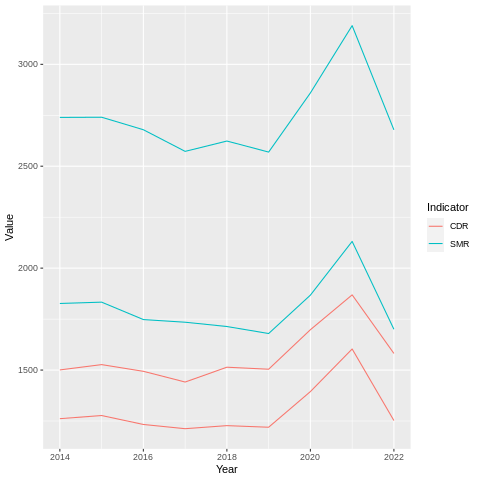

In [210]:
%%R
ggplot(my.data3, aes(x=Year, y=Value, color=Indicator, shape=Sex))+
        geom_line()